<h1 align="center">YRoots</h1>

YRoots is a numerical rootfinding package which can be used to solve multivariate systems of nonlinear equations, like those arising from optimization problems in finding critical points. While other rootfinders exist, YRoots is unique in that it finds all the roots in a compact interval.

Download YRoots from github to begin using the package.

  ```git
      git clone https://github.com/tylerjarvis/RootFinding/tree/master   
  ```
  
We demonstrate here how to use YRoots.

In [1]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#autoreload
%load_ext autoreload
%autoreload 2

## Multivariate Functions

To find the commmon zeros of a set of multivariate functions, input a list of functions and a search interval. The syntax for this is:

```python
yr.solve(funcs, a, b)
```

where `funcs` is a list of $n$ **vectorized** functions in $n$ variables and `a` and `b` are array-like objects of upper and lower bounds (respectively) of the search domain in each dimension. For bivariate systems, the optional parameter `plot` allows the user to graph the zero-loci and roots of the functions.

YRoots returns an numpy array where each row is a root.

### Two variables
Here is an example of YRoots solving the bivariate system of equations

$$0 = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4}$$
$$6 = \cos(3xy) + e^{\frac{3y}{x-2}} - x.$$

Solutions of the system subject to the constrains $-1\leq x\leq0,-2\leq y\leq1$ are common roots of the functions

$$f(x,y) = \sin(xy) + x\log(y+3) - x^2 + \frac{1}{y-4} $$
$$g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6$$ on the search domain $[-1,0]\times[-2,1]$.

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [-0.48606961 -1.59277526] [-0.35768674 -1.20762666]

<Figure size 7200x4800 with 0 Axes>

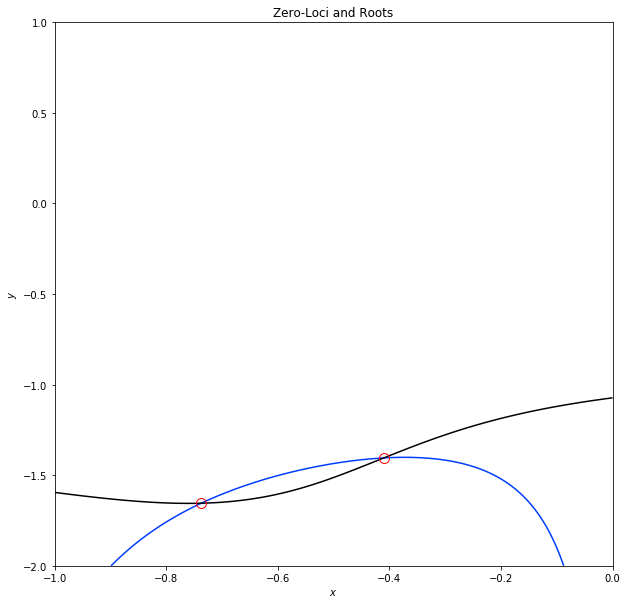

[[array([-0.23626367, -1.59277526]), array([-0.11484059, -1.20762666])], [array([-0.35768674, -1.59277526]), array([-0.23626367, -1.20762666])], [array([-0.48606961, -1.59277526]), array([-0.35768674, -1.20762666])], [array([-0.60749269, -1.59277526]), array([-0.48606961, -1.20762666])], [array([-0.73587555, -2.        ]), array([-0.60749269, -1.59277526])], [array([-0.79827856, -1.79071483]), array([-0.73587555, -1.59277526])], [array([-0.86425842, -1.79071483]), array([-0.79827856, -1.59277526])]]
CPU times: user 1.92 s, sys: 149 ms, total: 2.07 s
Wall time: 1.65 s


(2, 5.625726393343466e-07, 1.1492161537951517e-05)

In [2]:
#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y

#time
%time roots = yr.solve([f,g], a, b,plot=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Here is a slightly more complex system on the search domain $[-1,1]\times[-1,1]$ from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$f=\sin(30x−y/30)+y$$
$$g=\sin(x/30−30y)−x$$

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [0.77031882 0.77031882] [0.83098324 0.83098324]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:173: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[spot] = vecs[-(1+spot)][i]/vecs[-1][i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: divide by zero encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:517: RuntimeWarning: invalid value encountered in multiply
  c = chebval2(points[:,0],c)
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/subdivision.py:447: RuntimeWarning: invalid value encountered in less
  good_zeros = zeros[np.all(np.abs(zeros.i

Interval -  [-0.47175111 -0.27564979] [-0.403933   -0.21498538]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:171: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[spot] = vecs[-(2+spot)][i]/vecs[-1][i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:519: RuntimeWarning: invalid value encountered in multiply
  c = chebval(points[:,i],c)


<Figure size 7200x4800 with 0 Axes>

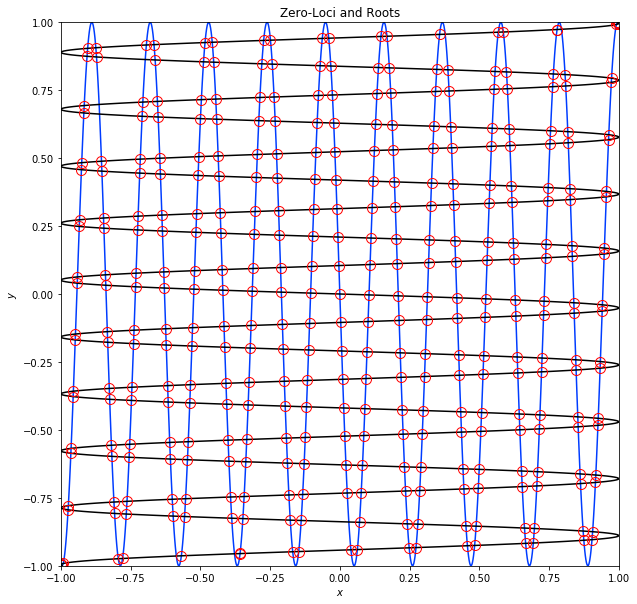

[[array([0.94573468, 0.94573468]), array([1., 1.])], [array([0.97362328, 0.77031882]), array([1.        , 0.80149611])], [array([0.94573468, 0.77031882]), array([0.97362328, 0.80149611])], [array([0.77031882, 0.94573468]), array([0.83098324, 1.        ])], [array([0.80149611, 0.80149611]), array([0.83098324, 0.83098324])], [array([0.94573468, 0.56043699]), array([0.97362328, 0.59161427])], [array([0.80149611, 0.74243023]), array([0.83098324, 0.77031882])], [array([0.80149611, 0.59161427]), array([0.83098324, 0.62279156])], [array([0.81665044, 0.54441403]), array([0.83098324, 0.56043699])], [array([0.7129431 , 0.77031882]), array([0.77031882, 0.83098324])], [array([0.56043699, 0.94573468]), array([0.59161427, 0.97362328])], [array([0.59161427, 0.80149611]), array([0.62279156, 0.83098324])], [array([0.52747267, 0.80149611]), array([0.56043699, 0.83098324])], [array([0.74243023, 0.74243023]), array([0.77031882, 0.77031882])], [array([0.74243023, 0.59161427]), array([0.77031882, 0.62279156

(360, 0.0032238741465375753, 0.009262753723689121)

In [3]:
#functions
f = lambda x,y: np.sin(30*x-y/30)+y
g = lambda x,y: np.sin(x/30-30*y)-x
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots =  yr.solve([f,g], a, b,plot=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Here is a more complicated bivariate system. It runs in about two minutes on the region $[-5,5]\times[-5,5]$.

$$f(x,y) = \sin(20x+y)$$
$$g(x,y) = \cos(x^2+xy)-\frac{1}{4}$$

Notice that YRoots correctly avoids points that are nearly roots but are not roots.

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [4.30235183 4.86811639] [4.37401581 4.93589539]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:171: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[spot] = vecs[-(2+spot)][i]/vecs[-1][i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: divide by zero encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:519: RuntimeWarning: invalid value encountered in multiply
  c = chebval(points[:,i],c)
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/subdivision.py:447: RuntimeWarning: invalid value encountered in less
  good_zeros = zeros[np.all(np.abs(zeros.im

Interval -  [-4.64147331 -4.64147331] [-4.59544462 -4.59544462]701e+00]451e-04]

<Figure size 7200x4800 with 0 Axes>

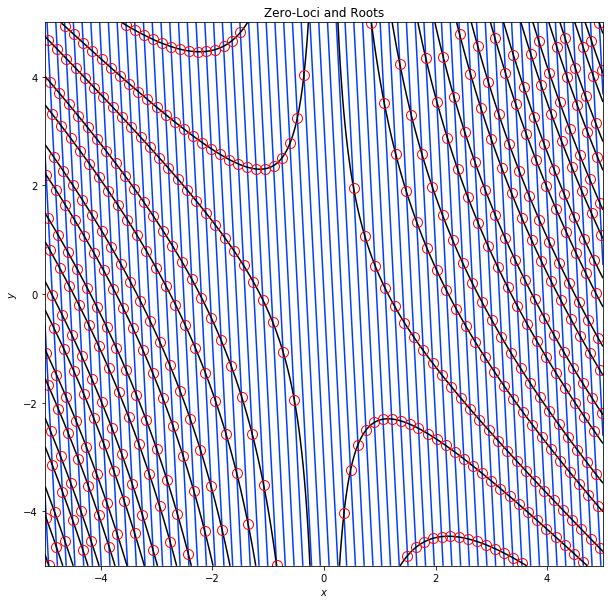

[[array([4.93589539, 4.93589539]), array([4.9688407, 4.9688407])], [array([4.93589539, 4.90295008]), array([4.9688407 , 4.93589539])], [array([4.90295008, 4.9688407 ]), array([4.93589539, 5.        ])], [array([4.76550372, 4.72867342]), array([4.8003374 , 4.76550372])], [array([4.76550372, 4.69572811]), array([4.8003374 , 4.72867342])], [array([4.76550372, 4.66089442]), array([4.8003374 , 4.69572811])], [array([4.76550372, 4.62606074]), array([4.8003374 , 4.66089442])], [array([4.8003374 , 4.51756646]), array([4.83517109, 4.55439676])], [array([4.62606074, 4.58923044]), array([4.66089442, 4.62606074])], [array([4.62606074, 4.55439676]), array([4.66089442, 4.58923044])], [array([4.62606074, 4.51756646]), array([4.66089442, 4.55439676])], [array([4.62606074, 4.48073616]), array([4.66089442, 4.51756646])], [array([4.9688407, 4.1200825]), array([5.        , 4.15491619])], [array([4.9688407, 4.0832522]), array([5.       , 4.1200825])], [array([4.9688407 , 4.04642191]), array([5.       , 4.0

(452, 1.1626306566844307e-05, 1.8049261409747164e-05)

In [4]:
#define functions and search domain
f = lambda x,y : np.sin(20*x+y)
g = lambda x,y : np.cos(x**2+x*y)-.25
a = [-5,-5]
b = [5,5]

#solve and time
%time roots = yr.solve([f,g], a, b,plot=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Here is an ill-conditioned system, on search domain $[-1,1]\times[-1,1]$ from [this paper](https://link.springer.com/article/10.1007/s00211-014-0635-z).

$$\Pi_{i=0}^{10}(y^2(4y^2−\frac{i}{10})−x^2(4x^2−1)) = 0$$
$$256(x^2+y^2)^2+288(x^2+y^2)−512(x^3−3xy^2)=27$$

In [5]:
#functions
f = lambda x,y: np.prod([y**2*(4*y**2-i/10)-x**2*(4*x**2-1) for i in range(11)],axis=0)
g = lambda x,y: 256*(x**2+y**2)**2+288*(x**2+y**2)-512*(x**3-3*x*y**2)-27
#search domain
a = [-1,-1] #lower
b = [1,1] #upper
#time
%time roots = yr.solve([f,g], a, b,plot=True,plot_intervals=True)

#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots[:,0],roots[:,1]))),np.max(np.abs(g(roots[:,0],roots[:,1])))

Interval -  [0.57973949 0.02786078] [0.57973949 0.02786078]

RecursionError: maximum recursion depth exceeded

(452, 2.0771991158515388e+37, 760721.7388742272)

### Using YRoots for optimization

YRoots can also be used for optimization problems, since the common roots of the partial derivatives of a function are critical points. For example, Nick Trefethen's Hundred-dollar, Hundred-digit Challenge problems include finding the minimum of the function 

$$f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70 \sin (x))+\sin(\sin(80y)) - \sin(10(x+y)) + 1/4(x^2 + y^2).$$

(Problem 4, [here](https://en.wikipedia.org/wiki/Hundred-dollar,_Hundred-digit_Challenge_problems)) Since the global mimium occurs when the the partial derivatives are both zero, to find the global minumum we can evaluate f at the common zeros of $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$ and choose the smallest value.



In [6]:
#define function
f = lambda x,y : np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) \
                - np.sin(10*(x+y)) + .25 * (x**2 + y**2)

#partial derivatives
fx = lambda x,y : 50*np.cos(50*x)*np.exp(np.sin(50*x)) + 70*np.cos(x)*np.cos(70*np.sin(x)) - 10*np.cos(10*(x+y)) + .5 * x
fy = lambda x,y : 60*np.exp(y)*np.cos(60*np.exp(y)) + 80*np.sin(80*y)*np.cos(np.sin(80*y)) - 10*np.cos(10*(x+y)) + .5 * y

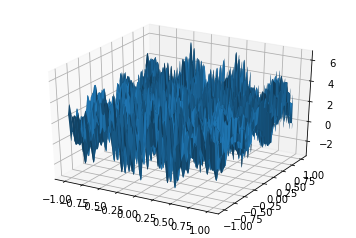

In [7]:
#3D plot of the function to optimize
x = np.linspace(-1,1, 1000)
X, Y = np.meshgrid(x, x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, f(X,Y))

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [-0.9902666  -0.97185513] [-0.98106087 -0.96314845]902e-05]0.59161427] [0.38773368 0.59984896][-0.15442419 -0.11187821] [-0.15084377 -0.10809257][-0.02172667 -0.8642622 ]

<Figure size 7200x4800 with 0 Axes>

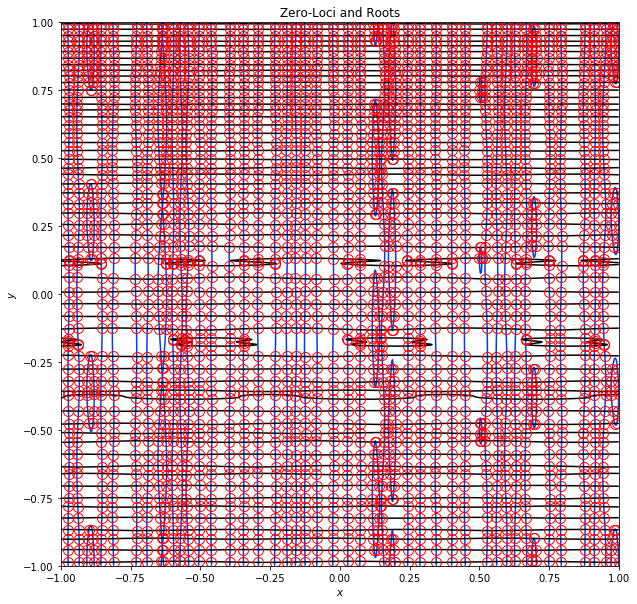

[[array([0.99376814, 0.99376814]), array([0.99541413, 0.99541413])], [array([0.99541413, 0.97362328]), array([0.99697088, 0.97546336])], [array([0.9772037 , 0.99376814]), array([0.97894403, 0.99541413])], [array([0.97546336, 0.97362328]), array([0.9772037 , 0.97546336])], [array([0.99697088, 0.94952033]), array([0.99852764, 0.95136041])], [array([0.97362328, 0.94952033]), array([0.97546336, 0.95136041])], [array([0.95136041, 0.99376814]), array([0.95310074, 0.99541413])], [array([0.95136041, 0.97206652]), array([0.95310074, 0.97362328])], [array([0.95310074, 0.94952033]), array([0.95494083, 0.95136041])], [array([0.99852764, 0.92879257]), array([1.       , 0.9305329])], [array([0.99697088, 0.92879257]), array([0.99852764, 0.9305329 ])], [array([0.99852764, 0.91271944]), array([1.        , 0.91445977])], [array([0.99852764, 0.89041603]), array([1.        , 0.89236159])], [array([0.97206652, 0.92879257]), array([0.97362328, 0.9305329 ])], [array([0.95310074, 0.92879257]), array([0.954940

In [8]:
#find common roots
low = -np.ones(2)
upp = np.ones(2)
%time zeros = yr.solve([fx,fy],low,upp,plot=True)

In [9]:
#maximum residuals of common roots
np.max(np.abs(fx(zeros[:,0],zeros[:,1]))),np.max(np.abs(fy(zeros[:,0],zeros[:,1])))

(0.006556648191222203, 0.005538622790763212)

In [10]:
#evaluate at critical points
values = f(zeros[:,0],zeros[:,1])
#report mimima and minimizers
mimimizer = np.argmin(values)
values[mimimizer], zeros[mimimizer]

(-3.2160794461199713, array([-0.02447331,  0.21502466]))

YRoots can solve systems in higher dimensions as well. Moving forward, our goal is to increase rootfinding feasibility for high dimensional systems.

Here are examples of YRoots running on systems in three and four variables.

### Three variables, Domain $[-1,1]\times[-1,1]\times[-1,1]$

$$ f(x,y,z) = sin(5x+y+z)$$
$$ g(x,y,z) = sin(xyz)$$
$$ h(x,y,z) = x^2 + y^2 - z^2 - 1$$


In [11]:
#define the functions and the search domain
f = lambda x,y,z : np.sin(5*x+y+z)
g = lambda x,y,z : np.sin(x*y*z)
h = lambda x,y,z : x**2+y**2-z**2-1
a = -np.ones(3)
b = np.ones(3)

In [12]:
#solve and time
%time roots = yr.solve([f,g,h], a, b)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(*[roots[:,i] for i in range(3)]))),np.max(np.abs(g(*[roots[:,i] for i in range(3)]))),np.max(np.abs(h(*[roots[:,i] for i in range(3)])))

Interval -  [0.02786078 0.65227869 0.77031882] [0.15982049 0.77031882 0.88835896]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [ 0.02786078  0.28462651 -0.3397914 ] [ 0.15982049  0.40943253 -0.21498538]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Interval -  [-0.59655713 -0.47175111 -0.72851684] [-0.47175111 -0.3397914  -0.59655713][[array([0.28462651, 0.77031882, 0.02786078]), array([0.52747267, 1.        , 0.28462651])], [array([ 0.52747267,  0.52747267, -0.21498538]), array([0.77031882, 0.77031882, 0.02786078])], [array([ 0.28462651,  0.77031882, -0.21498538]), array([0.52747267, 1.        , 0.02786078])], [array([ 0.28462651,  0.77031882, -0.47175111]), array([ 0.52747267,  1.        , -0.21498538])], [array([ 0.77031882, -0.72851684,  0.02786078]), array([ 1.        , -0.47175111,  0.28462651])], [array([ 0.52747267, -0.72851684,  0.02786078]), array([ 0.77031882, -0.47175111,  0.28462651])], [array([ 0.52747267, -1.        ,  0.02786078]), array([ 0.77031882, -0.72851684,  0.28462651])], [array([ 0.15982049, -1.        ,  0.02786078]), array([ 0.28462651, -0.86047655,  0.15982049])], [array([ 0.02786078, -1.        ,  0.15982049]), array([ 0.15982049, -0.86047655,  0.28462651])], [array([ 0.02786078, -1.        ,  0.02786

(6, 7.83062315934475e-05, 2.9371651684131067e-06, 1.0141039896716109e-08)

The code below graphs these level surfaces and their common roots (code is from [here](https://stackoverflow.com/questions/4680525/plotting-implicit-equations-in-3d)).

/Users/SuzannaStephensonAdmin/.local/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-1, 1)

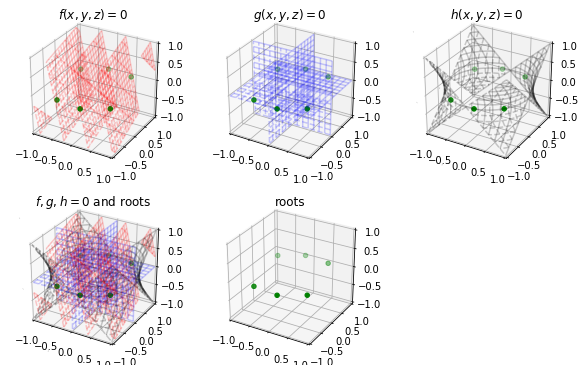

In [13]:
#function for plotting level surfaces in 3D
def plot_implicit(fn, color, bbox=(-1,1)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], colors=color,alpha=.2,zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], colors=color,alpha=.2,zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], colors=color,alpha=.2,zdir='x')

    #set plot limits
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)
    
#plot each level surface individually, then together

#f
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(631, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
ax.set_title('$f(x,y,z)=0$')

#g
ax = fig.add_subplot(632, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(g,'b')
ax.set_title('$g(x,y,z)=0$')

#h
ax = fig.add_subplot(633, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(h,'k')
ax.set_title('$h(x,y,z)=0$')

#together
ax = fig.add_subplot(634, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
plot_implicit(f,'r')
plot_implicit(g,'b')
plot_implicit(h,'k')
ax.set_title('$f,g,h = 0$ and roots')

#just the roots
ax = fig.add_subplot(635, projection='3d')
ax.scatter(*[roots[:,i] for i in range(3)],color='g')
ax.set_title('roots')
ax.set_zlim3d(-1,1)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)

### Univariate Functions

The `yr.solve` method can also be used to quickly find the roots of a univariate function. In this case, `a` and `b` can simply be entered as floats, and the `funcs` does not need to be a list.

As an example, we find the zeros of $f(x) = \sin(e^{3x})$ on $[-1,2]$.

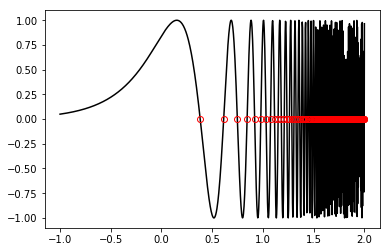

CPU times: user 285 ms, sys: 29.4 ms, total: 314 ms
Wall time: 169 ms


(128, 0.0004056404618097104)

In [14]:
#define the function and search interval
f = lambda x : np.sin(np.exp(3*x))

a = -1
b = 2

#solve and time
%time roots = yr.solve(f, a, b, plot=True)
#show the number of roots and maximal residuals
roots.size,np.max(np.abs(f(roots)))

## Polynomials

When a function in a system is a polynomial, it may be useful to pass it in as a YRoots's `Polynomial` object. `Polynomial` objects may be more cumbersome to create, but they have a special `evaluate_grid` method which allows for faster Chebyshev-approximations.

If the system only includes `Polynomial` objects, it may be preferable to use the alternative `yr.polysolve` method which does not rely on Chebyshev approximations. The gains in speed depend on the degree and dimension of the system. Heuristically, these methods are faster than `yr.solve` for lower degree polynomial systems, but **these methods are only stable for roots where each coordinate has absolute value $< 1$.**

We demonstrate how to create `Polynomial` objects and how to use `yr.polysolve`.

### YRoot Polynomials

The two types of `Polynomial` objects are `MultiPower` and `MultiCheb`, corresponding to multivariate polynomials in the power basis and Chebyshev basis respectively. 
Polynomials in $n$-dimensions are represented by an $n$-dimensional array of coefficients. For a system with three variables, the $(i,j,k)$ spot in the coefficient tensor corresponds to the coefficients of $x^iy^jz^k$ in the power basis or $T_i(x)T_j(y)T_k(z)$ in the Chebyshev basis. It is probably easiest to construct this coefficient tensor by initializing a tensor of zeros and then setting each nonzero coefficient to the correct value.

For example, $f(x,y) = 5x^3 + 4 xy^2 + 3x^2 + 2y^2 + 1$ would be initialized as 
```python
coeff = np.zeros((4,4)) #4x4 matrix because it's a degree 3 polynomial
coeff[3,0] = 5
coeff[1,2] = 4
coeff[2,0] = 3
coeff[0,2] = 2
coeff[0,0] = 1
f = yr.MultiPower(coeff)```
                         
and $g(x,y,z) = 3T_1(x)T_2(y) + 5 T_2(z) + 2$ would be initialized as

```python
coeff = np.zeros((4,4,4))
coeff[1,2,0] = 3
coeff[0,0,5] = 5
coeff[0,0,0] = 2
g = yr.MultiCheb(coeff)```

### Polysolve

The function `yr.polysolve` has many options for polynomial rootfinding, but the default parameters are the most robust for most systems. The syntax is

```python
yr.polysolve(polys)```

where `polys` is a list of polynomial objects. All of the polynomials must be represented in the same basis. For systems that come from Chebyshev approximations, it may be better to add the optional parameter `MSmatrix=-1`.

As mentioned above, Polysolve is **only stable for finding roots where each coordinate has absolute value $< 1$.** Other roots near this region may be accurate, but how far away you can go before loosing accuracy depends on the degrees of the polynomials. By default, the system returns all the roots. To return only the roots which are guaranteed to be computed stably, use the optional parameter `return_all_roots=False`.

Additionally, while `yr.solve` only finds real roots, `yr.polysolve` finds complex roots as well. 

Below, we find the common roots of 

$$f(x,y) = y^2 + 3xy - 4x +1$$
$$g(x,y) = -6xy -2x^2 + 6y +3.$$


In [15]:
#direct construction of polynomials with coefficient tensors
f = yr.MultiPower(np.array([[1, -4, 0],[0, 3, 0],[1, 0, 0]]))
g = yr.MultiPower(np.array([[3, 0, -2],[6, -6, 0],[0, 0, 0]]))

#solve and time
%time roots = yr.polysolve([f,g], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots))),np.max(np.abs(g(roots)))

CPU times: user 4.28 ms, sys: 1.37 ms, total: 5.65 ms
Wall time: 2.74 ms


(4, 2.6645352591003757e-14, 3.907985046680551e-14)

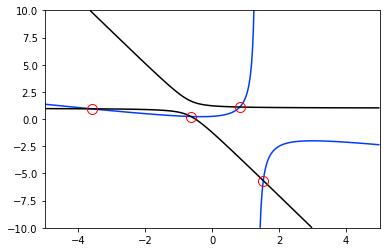

In [16]:
#plot f,g and roots
x = np.linspace(-5,5,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,g(np.array(list(zip(X,Y)))),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)

In this case, the polynomias are of low degree, so even the roots outside the interval $[-1,1]\times[-1,1]$ are accurate.

We now find the common roots of the randomly generated polynomials higher degree polynomials A and B. In the first case, we return all the complex roots Polyroots found, and in the second we only return roots in the unit box.

In [17]:
#get three random 2D polynomials of a certain degree in the power basis
degree = 20
A = yr.MultiPower(np.random.rand(degree,degree))
B = yr.MultiPower(np.random.rand(degree,degree))

#A and B will have roots at infinity (which yr.polysolve cannot yet handle) 
# unless their coefficient matrices are upper left triangular
A = yr.MultiPower(np.fliplr(np.triu(np.fliplr(A.coeff))))
B = yr.MultiPower(np.fliplr(np.triu(np.fliplr(B.coeff))))

In [18]:
#All roots
#solve and time
%time roots = yr.polysolve([A,B], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(A(roots)),np.max(B(roots))

CPU times: user 379 ms, sys: 67.6 ms, total: 447 ms
Wall time: 347 ms


(344,
 (0.027737923214999682+0.026234407700030715j),
 (0.027315748837054343+0.003108323373908206j))

In [19]:
#Roots in unit box
#solve and time
%time accurate_roots = yr.polysolve([A,B],return_all_roots=False)
#show the number of roots and maximal residuals
accurate_roots.shape[0],np.max(A(accurate_roots)),np.max(B(accurate_roots))

CPU times: user 322 ms, sys: 39.8 ms, total: 362 ms
Wall time: 343 ms


(125,
 (8.446465749045728e-11+1.4003909143411875e-11j),
 (6.542943964404913e-11+1.2614798095000879e-11j))

Clearly, roots in the unit interval are more accurate for these higher degree systems. Still, real roots outside the region are visually perfect.

/Users/SuzannaStephensonAdmin/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


array([[ 1.2957306 -0.j, -1.19219934-0.j],
       [-0.91952248+0.j,  0.43673981+0.j]])

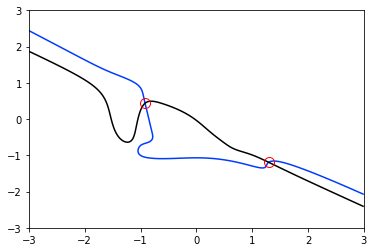

In [20]:
#plot A,B and real roots
x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,A(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,B(np.array(list(zip(X,Y)))),levels=[0],colors='k')
#plot only the real roots
real_roots = roots[np.all(np.abs(roots.imag) < 1.e-10,axis = 1)]
plt.plot(real_roots[:,0],real_roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)
real_roots

# Logo

In [21]:
#making logo
one = lambda x,y: (y-.8)*(10*x+2.3)-.06*(2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)
two = lambda x,y: (y-.8)*(-10*x+2.3)-.06*(-2.5*x+2.3)**3+2+.2*np.sin(50*x)+.2*np.cos(50*y)

(-1.0, 1.0, -1.0, 1.0)

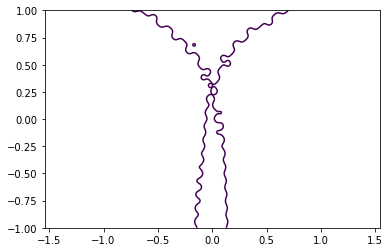

In [22]:
funcs = [one,two]
dim=2
#print the contours
contour_colors = ['#003cff','k'] #royal blue and black
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
for f in funcs:
    plt.contour(X,Y,f(X,Y),levels=[0])
plt.axis([-1,1,-1,1])
plt.axis('equal')

Interval -  [-0.21498538  0.74243023] [-0.18202105  0.77031882]961e-01]

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:173: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[spot] = vecs[-(1+spot)][i]/vecs[-1][i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: divide by zero encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:175: RuntimeWarning: invalid value encountered in cdouble_scalars
  root[divisor_var] = 1/vals[i]
/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/polynomial.py:517: RuntimeWarning: invalid value encountered in multiply
  c = chebval2(points[:,0],c

Interval -  [-0.72851684 -0.72851684] [-0.66069873 -0.66069873]-2.78150902e-05]Total intervals checked was 4054
Methods used were ['constant_term_check', 'full_quad_check', 'linear_check', 'Division', 'Base Case']
The percent solved by each was [99.41  0.42  0.    0.17  0.  ]


<Figure size 7200x4800 with 0 Axes>

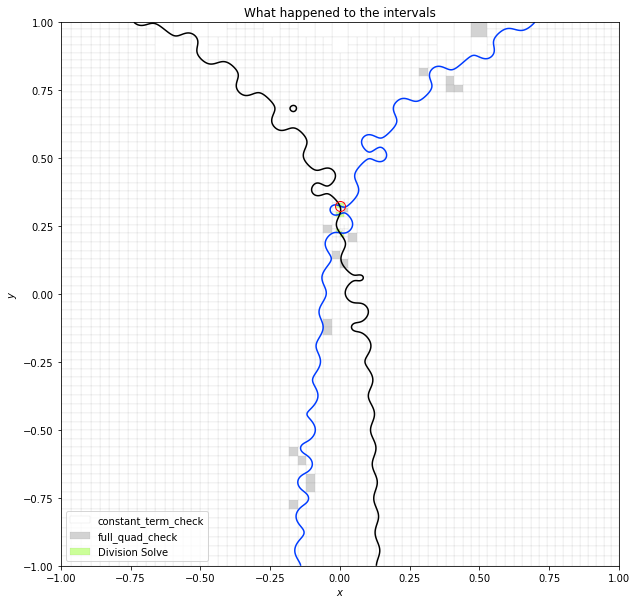

[[array([-2.78150902e-05,  3.17590834e-01]), array([0.01430498, 0.33361379])], [array([-2.78150902e-05,  2.84626513e-01]), array([0.01430498, 0.30156788])], [array([-0.01436061,  0.31759083]), array([-2.78150902e-05,  3.33613788e-01])], [array([-0.01436061,  0.28462651]), array([-2.78150902e-05,  3.01567879e-01])], [array([-2.78150902e-05,  2.23962100e-01]), array([0.00733824, 0.23219678])], [array([-0.01436061,  0.2239621 ]), array([-2.78150902e-05,  2.39985054e-01])], [array([-2.78150902e-05,  2.08807769e-01]), array([0.01430498, 0.2239621 ])]]


array([[1.59025290e-09, 3.22884661e-01]])

In [23]:
yr.solve([one,two],-np.ones(2),np.ones(2),plot=True,plot_intervals=True)

/Users/SuzannaStephensonAdmin/Documents/Research/RootFindingResearch/RootFinding/yroots/Division.py:28: UserWarning: return all roots not implemented
  warnings.warn('return all roots not implemented')


Total intervals checked was 1
Methods used were ['constant_term_check', 'full_quad_check', 'linear_check', 'Division', 'Base Case']
The percent solved by each was [  0.   0.   0. 100.   0.]


<Figure size 7200x4800 with 0 Axes>

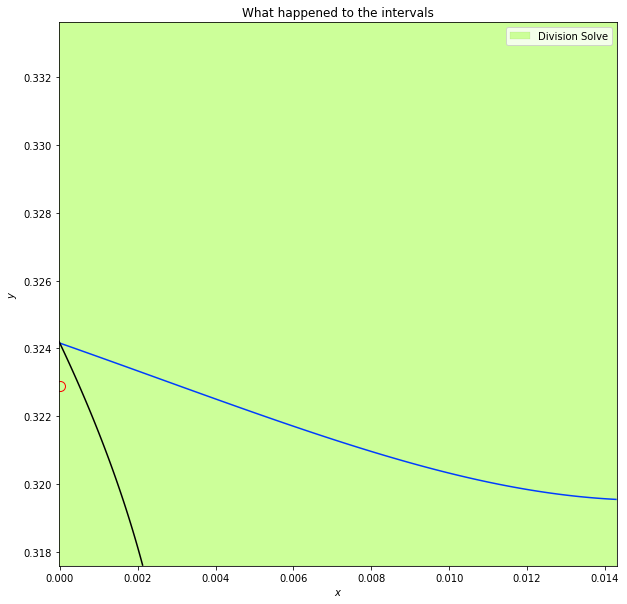

[[array([-2.78150902e-05,  3.17590834e-01]), array([0.01430498, 0.33361379])]]


array([[1.59024300e-09, 3.22884686e-01]])

In [25]:
yr.solve([one,two],np.array([-2.78150902e-05,  3.17590834e-01]), np.array([0.01430498, 0.33361379]),plot=True,plot_intervals=True)